### Ulam's Algorithm

#### Introduction to the Analysis of Algorithms (3rd ed)
##### Michael Soltys

##### Notebook by Ryan McIntyre

First, we import the algorithm.

In [1]:
from Ulam import ulam

And, for all $N\le65$, we'll run the algorithm and save the number of iterations to a dictionary.

In [2]:
results = dict()
N = 100000
for n in range(1,N):
    results[n] = ulam(n,0,False)

And, finally, we'll plot the results...

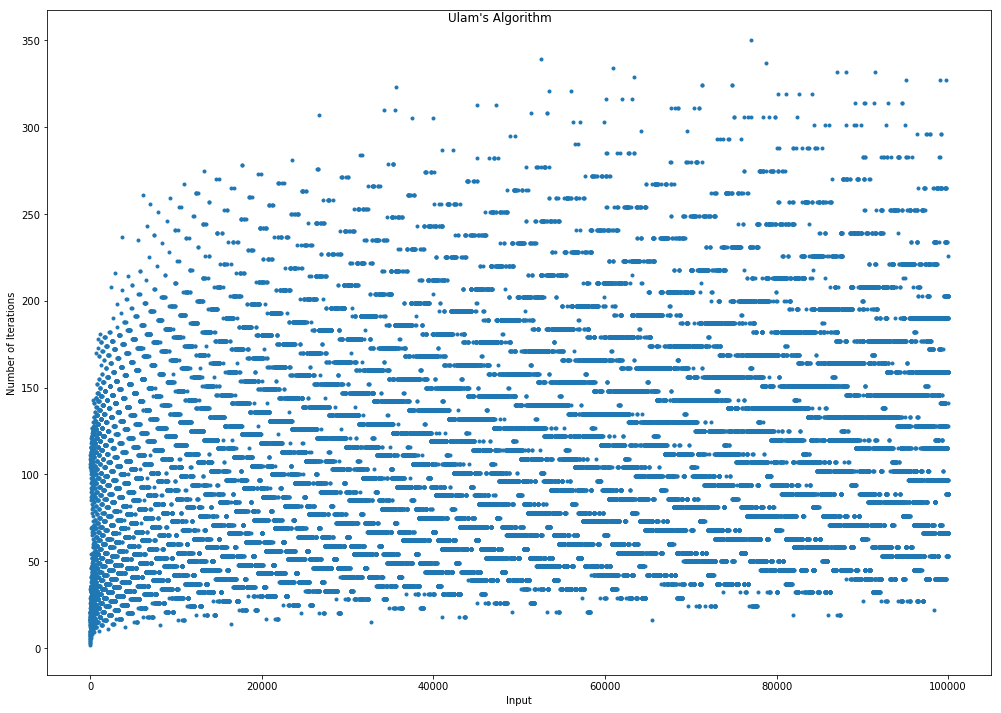

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

X = range(1,N)
Y = [results[x] for x in X]
fig = plt.figure(figsize=(14,10))
plt.xlabel('Input')
plt.ylabel('Number of Iterations')
plt.suptitle('Ulam\'s Algorithm')
plt.plot(X,Y,'.')
plt.tight_layout()
plt.show()

A few observations can be made right away, based off of the algorithm itself. If $n$ is a power of 2, then $log_2(n)$ iterations are needed (and in fact $log_2(n)$ is a lower bound for the iteration count). Any odd number $n$ requires 1 more iteration than $3n+1$, and any even number $n$ requires 1 fewer iteration than $n/2$. The plot above displays the complex pattern that emerges from these two simple recurrence relations. In light of this, it may shed some light to plot evens and odds seperately:

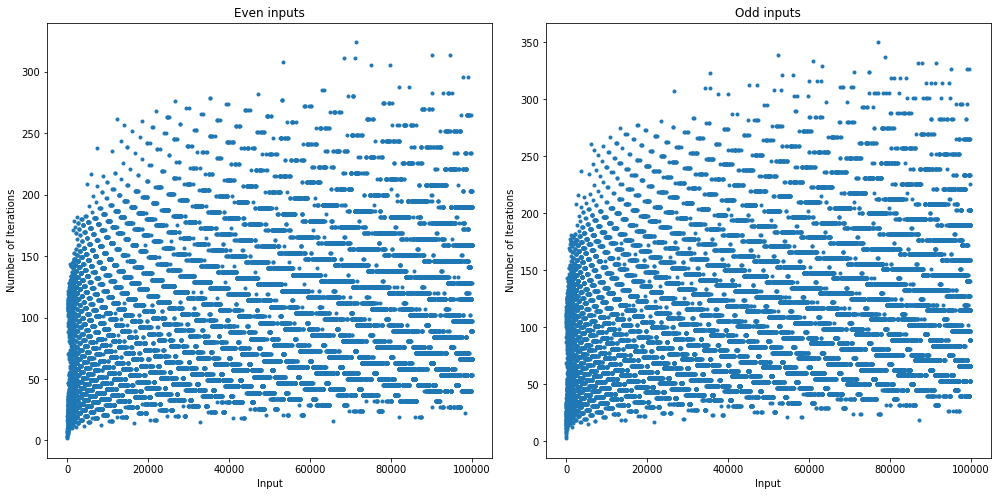

In [4]:
#organize data
Xe = [x for x in range(2,N,2)]
Ye = [results[x] for x in Xe]
Xo = [x for x in range(1,N,2)]
Yo = [results[x] for x in Xo]

#plot
fig,(axe,axo) = plt.subplots(1,2,figsize=(14,7))
axe.set_title('Even inputs')
axo.set_title('Odd inputs')
axe.plot(Xe,Ye,'.')
axo.plot(Xo,Yo,'.')
axe.set_xlabel('Input')
axe.set_ylabel('Number of Iterations')
axo.set_xlabel('Input')
axo.set_ylabel('Number of Iterations')
plt.tight_layout()
plt.show()

That accomplished nothing, but it is notable that could rely solely on either of the plots above, as any even number will be divided in half until it is odd (so its iteration count can be derived from the resulting odd), and any odd number will me made even ($3n+1) and so it could be derived from the resulting even.

We will not prove termination here; as the text states, there is no known proof of termination. However, we can state a few statements whose proofs would complete a proof of termination:
<ol>
<li> Given any number $n$, the sequence genereted by ulam($n$) necessarily contains a number smaller than $n$ ($n>1$). </li>
<li> Given any even number $e$, the sequence generated by ulam($e$) neccessarily contains a smaller even number ($e>2$). </li>
<li> Given any odd number $o$, the sequence generated by ulan($o$) necessarily contains a number smaller than $o$ ($o>1$) </li>
</ol>

Note that (1)and (3) are clearly identical, as obviously any even number is immediately followed by a smaller number when it is divided in half. (2), on the other hand, works because of the Least Number Principle; there is a smallest positive even number, 2, and this number leads to termination, so establishing a decreasing sequence of evens necessarily leads to termination.